---
Example notebook to explain the usage of the code
---
Author: Pierre Burger

---

# First import all packages

In [1]:
import numpy as np
import pylab as plt
import modules
from astropy.io import fits
import treecorr
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bars


## Define class

In [2]:
LensingMocks = modules.LensingMocks(download_dir='T17_data',output_dir='outputs',nres = 12, nsbins = 5)

## Load in some n(z) and define the N(z) that the code used to get the right number of galaxies ad the right redshift bin

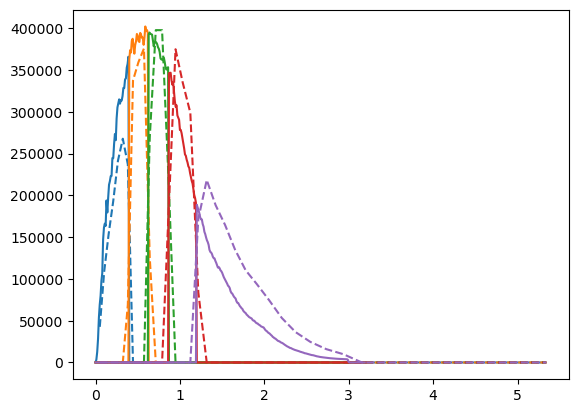

In [3]:
import healpy as hp
number_of_galaxies = hp.nside2pixarea(nside=1,degrees=True)*12*3600*0.3

nofz_FS2_mean = np.loadtxt('nofz/nofz_FS2_mean.dat')
nofz_FS2_mean[:,1] = nofz_FS2_mean[:,1]/np.sum(nofz_FS2_mean[:,1])
nofz_FS2_cumsum = np.cumsum(nofz_FS2_mean[:,1])

Nsbin = 5
zbin = [0]
for bin in [1/Nsbin,2/Nsbin,3/Nsbin,4/Nsbin]:
    zbin.append(np.where(abs(nofz_FS2_cumsum-bin).min()==abs(nofz_FS2_cumsum-bin))[0][0])
zbin.append(len(nofz_FS2_cumsum))

nz_list = np.array([np.zeros_like(nofz_FS2_mean[:,1]) for i in range(Nsbin)])
z_list = np.array([np.zeros_like(nofz_FS2_mean[:,0]) for i in range(Nsbin)])
for i in range(5):
    z_list[i]=nofz_FS2_mean[:,0]-0.005
    nz_list[i,zbin[i]:zbin[i+1]]=nofz_FS2_mean[zbin[i]:zbin[i+1],1]*number_of_galaxies
    
LensingMocks.compute_T17_Nz(z_persbin=z_list, Nz_persbin=nz_list)

for i in range(5):
    plt.plot(z_list[i],nz_list[i],c='C'+str(i))
    plt.plot(LensingMocks.zbins[:,0],LensingMocks.N_T17_persbin[i]/7,c='C'+str(i),linestyle='--')

In [4]:
number_of_galaxies

44553198.14937281

In [5]:
nofz_FS2_cumsum

array([4.34836930e-06, 8.05817663e-05, 3.62833196e-04, 9.99327846e-04,
       2.20455225e-03, 3.75855414e-03, 5.54846314e-03, 7.73849414e-03,
       1.01378743e-02, 1.34405013e-02, 1.70641872e-02, 2.07943985e-02,
       2.44636294e-02, 2.88159146e-02, 3.28455625e-02, 3.72745713e-02,
       4.20485621e-02, 4.69168817e-02, 5.19207307e-02, 5.69324679e-02,
       6.24254024e-02, 6.79112096e-02, 7.37805943e-02, 7.99188313e-02,
       8.58905538e-02, 9.24475130e-02, 9.93024529e-02, 1.06262307e-01,
       1.13331337e-01, 1.20283482e-01, 1.27336161e-01, 1.34373361e-01,
       1.41526411e-01, 1.48901703e-01, 1.56272442e-01, 1.63876669e-01,
       1.71509268e-01, 1.79429606e-01, 1.87450659e-01, 1.95664133e-01,
       2.03809314e-01, 2.12199468e-01, 2.20526003e-01, 2.29167331e-01,
       2.37864079e-01, 2.46363906e-01, 2.54659814e-01, 2.63189523e-01,
       2.71816444e-01, 2.80641566e-01, 2.89426114e-01, 2.98058398e-01,
       3.06668616e-01, 3.15522225e-01, 3.24320750e-01, 3.33045963e-01,
      

## Check if all files are available for the chosen line-of-sight (los) 

In [6]:
los = 0
LensingMocks.check_files(los=los)

All source files available
Density file T17_data/allskymap_nres12r000.delta_shell.dat available


## Prepare the galaxy postions using the density maps, which ensures we have source clustering

In [7]:
LensingMocks.create_gal_positions(los = los, overwrite=True)

Reading density shells:   0%|          | 0/38 [00:00<?, ?it/s]

{'total': 48.0, 'available': 34.9725341796875, 'percent': 27.1, 'used': 11.329483032226562, 'free': 26.370819091796875, 'active': 8.04931640625, 'inactive': 7.786529541015625, 'wired': 3.2801666259765625}
precomputing /outputs/gal_pos_zbin0_sbin0.npz
precomputing /outputs/gal_pos_zbin0_sbin1.npz
precomputing /outputs/gal_pos_zbin0_sbin2.npz
precomputing /outputs/gal_pos_zbin0_sbin3.npz
precomputing /outputs/gal_pos_zbin0_sbin4.npz


Reading density shells:   3%|▎         | 1/38 [00:05<03:10,  5.14s/it]

{'total': 48.0, 'available': 34.82279968261719, 'percent': 27.5, 'used': 11.482528686523438, 'free': 25.401626586914062, 'active': 7.924774169921875, 'inactive': 8.592025756835938, 'wired': 3.5577545166015625}
precomputing /outputs/gal_pos_zbin1_sbin0.npz
precomputing /outputs/gal_pos_zbin1_sbin1.npz
precomputing /outputs/gal_pos_zbin1_sbin2.npz
precomputing /outputs/gal_pos_zbin1_sbin3.npz
precomputing /outputs/gal_pos_zbin1_sbin4.npz


Reading density shells:   5%|▌         | 2/38 [00:10<03:01,  5.04s/it]

{'total': 48.0, 'available': 35.042144775390625, 'percent': 27.0, 'used': 11.279022216796875, 'free': 24.873291015625, 'active': 8.105148315429688, 'inactive': 9.335891723632812, 'wired': 3.1738739013671875}
precomputing /outputs/gal_pos_zbin2_sbin0.npz
precomputing /outputs/gal_pos_zbin2_sbin1.npz
precomputing /outputs/gal_pos_zbin2_sbin2.npz
precomputing /outputs/gal_pos_zbin2_sbin3.npz
precomputing /outputs/gal_pos_zbin2_sbin4.npz


Reading density shells:   8%|▊         | 3/38 [00:14<02:53,  4.97s/it]

{'total': 48.0, 'available': 35.0328369140625, 'percent': 27.0, 'used': 11.28302001953125, 'free': 24.172882080078125, 'active': 7.84564208984375, 'inactive': 10.02252197265625, 'wired': 3.4373779296875}
precomputing /outputs/gal_pos_zbin3_sbin0.npz
precomputing /outputs/gal_pos_zbin3_sbin1.npz
precomputing /outputs/gal_pos_zbin3_sbin2.npz
precomputing /outputs/gal_pos_zbin3_sbin3.npz
precomputing /outputs/gal_pos_zbin3_sbin4.npz


Reading density shells:  11%|█         | 4/38 [00:19<02:47,  4.92s/it]

{'total': 48.0, 'available': 34.930755615234375, 'percent': 27.2, 'used': 11.403640747070312, 'free': 23.319671630859375, 'active': 8.345260620117188, 'inactive': 10.762741088867188, 'wired': 3.058380126953125}
precomputing /outputs/gal_pos_zbin4_sbin0.npz
precomputing /outputs/gal_pos_zbin4_sbin1.npz
precomputing /outputs/gal_pos_zbin4_sbin2.npz
precomputing /outputs/gal_pos_zbin4_sbin3.npz
precomputing /outputs/gal_pos_zbin4_sbin4.npz


Reading density shells:  13%|█▎        | 5/38 [00:24<02:40,  4.86s/it]

{'total': 48.0, 'available': 34.95408630371094, 'percent': 27.2, 'used': 11.385086059570312, 'free': 22.602767944335938, 'active': 8.313156127929688, 'inactive': 11.495864868164062, 'wired': 3.071929931640625}
precomputing /outputs/gal_pos_zbin5_sbin0.npz
precomputing /outputs/gal_pos_zbin5_sbin1.npz
precomputing /outputs/gal_pos_zbin5_sbin2.npz
precomputing /outputs/gal_pos_zbin5_sbin3.npz
precomputing /outputs/gal_pos_zbin5_sbin4.npz


Reading density shells:  16%|█▌        | 6/38 [00:29<02:34,  4.83s/it]

{'total': 48.0, 'available': 34.64057922363281, 'percent': 27.8, 'used': 11.707229614257812, 'free': 21.66339111328125, 'active': 7.669830322265625, 'inactive': 12.114166259765625, 'wired': 4.0373992919921875}
precomputing /outputs/gal_pos_zbin6_sbin0.npz
precomputing /outputs/gal_pos_zbin6_sbin1.npz
precomputing /outputs/gal_pos_zbin6_sbin2.npz
precomputing /outputs/gal_pos_zbin6_sbin3.npz
precomputing /outputs/gal_pos_zbin6_sbin4.npz


Reading density shells:  18%|█▊        | 7/38 [00:34<02:31,  4.90s/it]

{'total': 48.0, 'available': 34.79486083984375, 'percent': 27.5, 'used': 11.551162719726562, 'free': 21.06231689453125, 'active': 8.309661865234375, 'inactive': 12.860931396484375, 'wired': 3.2415008544921875}
precomputing /outputs/gal_pos_zbin7_sbin0.npz
precomputing /outputs/gal_pos_zbin7_sbin1.npz
precomputing /outputs/gal_pos_zbin7_sbin2.npz
precomputing /outputs/gal_pos_zbin7_sbin3.npz
precomputing /outputs/gal_pos_zbin7_sbin4.npz


Reading density shells:  21%|██        | 8/38 [00:39<02:25,  4.84s/it]

{'total': 48.0, 'available': 34.58802795410156, 'percent': 27.9, 'used': 11.7574462890625, 'free': 20.100692749023438, 'active': 7.6063232421875, 'inactive': 13.60662841796875, 'wired': 4.151123046875}
precomputing /outputs/gal_pos_zbin8_sbin0.npz
precomputing /outputs/gal_pos_zbin8_sbin1.npz
precomputing /outputs/gal_pos_zbin8_sbin2.npz
precomputing /outputs/gal_pos_zbin8_sbin3.npz
precomputing /outputs/gal_pos_zbin8_sbin4.npz


Reading density shells:  24%|██▎       | 9/38 [00:44<02:20,  4.86s/it]

{'total': 48.0, 'available': 34.56109619140625, 'percent': 28.0, 'used': 11.78643798828125, 'free': 19.2757568359375, 'active': 7.80841064453125, 'inactive': 14.372787475585938, 'wired': 3.97802734375}
precomputing /outputs/gal_pos_zbin9_sbin0.npz
precomputing /outputs/gal_pos_zbin9_sbin1.npz
precomputing /outputs/gal_pos_zbin9_sbin2.npz
precomputing /outputs/gal_pos_zbin9_sbin3.npz
precomputing /outputs/gal_pos_zbin9_sbin4.npz


Reading density shells:  26%|██▋       | 10/38 [00:48<02:14,  4.82s/it]

{'total': 48.0, 'available': 34.66804504394531, 'percent': 27.8, 'used': 11.68365478515625, 'free': 18.61260986328125, 'active': 8.438568115234375, 'inactive': 15.132354736328125, 'wired': 3.245086669921875}
precomputing /outputs/gal_pos_zbin10_sbin0.npz
precomputing /outputs/gal_pos_zbin10_sbin1.npz
precomputing /outputs/gal_pos_zbin10_sbin2.npz
precomputing /outputs/gal_pos_zbin10_sbin3.npz
precomputing /outputs/gal_pos_zbin10_sbin4.npz


Reading density shells:  29%|██▉       | 11/38 [00:53<02:12,  4.90s/it]

{'total': 48.0, 'available': 34.75706481933594, 'percent': 27.6, 'used': 11.591262817382812, 'free': 17.911590576171875, 'active': 8.34649658203125, 'inactive': 15.911941528320312, 'wired': 3.2447662353515625}
precomputing /outputs/gal_pos_zbin11_sbin0.npz
precomputing /outputs/gal_pos_zbin11_sbin1.npz
precomputing /outputs/gal_pos_zbin11_sbin2.npz
precomputing /outputs/gal_pos_zbin11_sbin3.npz
precomputing /outputs/gal_pos_zbin11_sbin4.npz


Reading density shells:  32%|███▏      | 12/38 [00:58<02:06,  4.85s/it]

{'total': 48.0, 'available': 34.762542724609375, 'percent': 27.6, 'used': 11.586196899414062, 'free': 17.14794921875, 'active': 8.34063720703125, 'inactive': 16.670333862304688, 'wired': 3.2455596923828125}
precomputing /outputs/gal_pos_zbin12_sbin0.npz
precomputing /outputs/gal_pos_zbin12_sbin1.npz
precomputing /outputs/gal_pos_zbin12_sbin2.npz
precomputing /outputs/gal_pos_zbin12_sbin3.npz
precomputing /outputs/gal_pos_zbin12_sbin4.npz


Reading density shells:  34%|███▍      | 13/38 [01:03<02:00,  4.83s/it]

{'total': 48.0, 'available': 34.771942138671875, 'percent': 27.6, 'used': 11.577926635742188, 'free': 16.397293090820312, 'active': 8.308792114257812, 'inactive': 17.420074462890625, 'wired': 3.269134521484375}
precomputing /outputs/gal_pos_zbin13_sbin0.npz
precomputing /outputs/gal_pos_zbin13_sbin1.npz
precomputing /outputs/gal_pos_zbin13_sbin2.npz
precomputing /outputs/gal_pos_zbin13_sbin3.npz
precomputing /outputs/gal_pos_zbin13_sbin4.npz


Reading density shells:  37%|███▋      | 14/38 [01:08<01:57,  4.89s/it]

{'total': 48.0, 'available': 34.76557922363281, 'percent': 27.6, 'used': 11.589889526367188, 'free': 15.630142211914062, 'active': 8.32061767578125, 'inactive': 18.170242309570312, 'wired': 3.2692718505859375}
precomputing /outputs/gal_pos_zbin14_sbin0.npz
precomputing /outputs/gal_pos_zbin14_sbin1.npz
precomputing /outputs/gal_pos_zbin14_sbin2.npz
precomputing /outputs/gal_pos_zbin14_sbin3.npz
precomputing /outputs/gal_pos_zbin14_sbin4.npz


Reading density shells:  39%|███▉      | 15/38 [01:13<01:51,  4.85s/it]

{'total': 48.0, 'available': 34.78157043457031, 'percent': 27.5, 'used': 11.572052001953125, 'free': 14.887802124023438, 'active': 8.302963256835938, 'inactive': 18.918136596679688, 'wired': 3.2690887451171875}
precomputing /outputs/gal_pos_zbin15_sbin0.npz
precomputing /outputs/gal_pos_zbin15_sbin1.npz
precomputing /outputs/gal_pos_zbin15_sbin2.npz
precomputing /outputs/gal_pos_zbin15_sbin3.npz
precomputing /outputs/gal_pos_zbin15_sbin4.npz


Reading density shells:  42%|████▏     | 16/38 [01:17<01:45,  4.82s/it]

{'total': 48.0, 'available': 34.7572021484375, 'percent': 27.6, 'used': 11.5924072265625, 'free': 14.104095458984375, 'active': 8.3245849609375, 'inactive': 19.668182373046875, 'wired': 3.267822265625}
precomputing /outputs/gal_pos_zbin16_sbin0.npz
precomputing /outputs/gal_pos_zbin16_sbin1.npz
precomputing /outputs/gal_pos_zbin16_sbin2.npz
precomputing /outputs/gal_pos_zbin16_sbin3.npz
precomputing /outputs/gal_pos_zbin16_sbin4.npz


Reading density shells:  45%|████▍     | 17/38 [01:22<01:40,  4.79s/it]

{'total': 48.0, 'available': 34.7691650390625, 'percent': 27.6, 'used': 11.587387084960938, 'free': 13.357269287109375, 'active': 8.313995361328125, 'inactive': 20.418304443359375, 'wired': 3.2733917236328125}
precomputing /outputs/gal_pos_zbin17_sbin0.npz
precomputing /outputs/gal_pos_zbin17_sbin1.npz
precomputing /outputs/gal_pos_zbin17_sbin2.npz
precomputing /outputs/gal_pos_zbin17_sbin3.npz
precomputing /outputs/gal_pos_zbin17_sbin4.npz


Reading density shells:  47%|████▋     | 18/38 [01:27<01:37,  4.85s/it]

{'total': 48.0, 'available': 34.75477600097656, 'percent': 27.6, 'used': 11.602325439453125, 'free': 12.586135864257812, 'active': 8.330886840820312, 'inactive': 21.168304443359375, 'wired': 3.2714385986328125}
precomputing /outputs/gal_pos_zbin18_sbin0.npz
precomputing /outputs/gal_pos_zbin18_sbin1.npz
precomputing /outputs/gal_pos_zbin18_sbin2.npz
precomputing /outputs/gal_pos_zbin18_sbin3.npz
precomputing /outputs/gal_pos_zbin18_sbin4.npz


Reading density shells:  50%|█████     | 19/38 [01:32<01:31,  4.82s/it]

{'total': 48.0, 'available': 34.75688171386719, 'percent': 27.6, 'used': 11.59796142578125, 'free': 11.831771850585938, 'active': 8.32470703125, 'inactive': 21.918365478515625, 'wired': 3.27325439453125}
precomputing /outputs/gal_pos_zbin19_sbin0.npz
precomputing /outputs/gal_pos_zbin19_sbin1.npz
precomputing /outputs/gal_pos_zbin19_sbin2.npz
precomputing /outputs/gal_pos_zbin19_sbin3.npz
precomputing /outputs/gal_pos_zbin19_sbin4.npz


Reading density shells:  53%|█████▎    | 20/38 [01:36<01:25,  4.77s/it]

{'total': 48.0, 'available': 34.75233459472656, 'percent': 27.6, 'used': 11.600723266601562, 'free': 11.072280883789062, 'active': 8.329116821289062, 'inactive': 22.66839599609375, 'wired': 3.2716064453125}
precomputing /outputs/gal_pos_zbin20_sbin0.npz
precomputing /outputs/gal_pos_zbin20_sbin1.npz
precomputing /outputs/gal_pos_zbin20_sbin2.npz
precomputing /outputs/gal_pos_zbin20_sbin3.npz
precomputing /outputs/gal_pos_zbin20_sbin4.npz


Reading density shells:  55%|█████▌    | 21/38 [01:41<01:20,  4.75s/it]

{'total': 48.0, 'available': 34.76524353027344, 'percent': 27.6, 'used': 11.586898803710938, 'free': 10.330398559570312, 'active': 8.313919067382812, 'inactive': 23.418319702148438, 'wired': 3.272979736328125}
precomputing /outputs/gal_pos_zbin21_sbin0.npz
precomputing /outputs/gal_pos_zbin21_sbin1.npz
precomputing /outputs/gal_pos_zbin21_sbin2.npz
precomputing /outputs/gal_pos_zbin21_sbin3.npz
precomputing /outputs/gal_pos_zbin21_sbin4.npz


Reading density shells:  58%|█████▊    | 22/38 [01:46<01:15,  4.72s/it]

{'total': 48.0, 'available': 34.73411560058594, 'percent': 27.6, 'used': 11.612060546875, 'free': 9.54559326171875, 'active': 8.339675903320312, 'inactive': 24.168380737304688, 'wired': 3.2723846435546875}
precomputing /outputs/gal_pos_zbin22_sbin0.npz
precomputing /outputs/gal_pos_zbin22_sbin1.npz
precomputing /outputs/gal_pos_zbin22_sbin2.npz
precomputing /outputs/gal_pos_zbin22_sbin3.npz
precomputing /outputs/gal_pos_zbin22_sbin4.npz


Reading density shells:  61%|██████    | 23/38 [01:50<01:10,  4.70s/it]

{'total': 48.0, 'available': 34.75294494628906, 'percent': 27.6, 'used': 11.60479736328125, 'free': 8.8116455078125, 'active': 8.3323974609375, 'inactive': 24.917251586914062, 'wired': 3.27239990234375}
precomputing /outputs/gal_pos_zbin23_sbin0.npz
precomputing /outputs/gal_pos_zbin23_sbin1.npz
precomputing /outputs/gal_pos_zbin23_sbin2.npz
precomputing /outputs/gal_pos_zbin23_sbin3.npz
precomputing /outputs/gal_pos_zbin23_sbin4.npz


Reading density shells:  63%|██████▎   | 24/38 [01:55<01:05,  4.69s/it]

{'total': 48.0, 'available': 34.71501159667969, 'percent': 27.7, 'used': 11.62811279296875, 'free': 8.02117919921875, 'active': 8.355300903320312, 'inactive': 25.667312622070312, 'wired': 3.2728118896484375}
precomputing /outputs/gal_pos_zbin24_sbin0.npz
precomputing /outputs/gal_pos_zbin24_sbin1.npz
precomputing /outputs/gal_pos_zbin24_sbin2.npz
precomputing /outputs/gal_pos_zbin24_sbin3.npz
precomputing /outputs/gal_pos_zbin24_sbin4.npz


Reading density shells:  66%|██████▌   | 25/38 [02:00<01:00,  4.67s/it]

{'total': 48.0, 'available': 34.708526611328125, 'percent': 27.7, 'used': 11.64422607421875, 'free': 7.26263427734375, 'active': 8.357803344726562, 'inactive': 26.417221069335938, 'wired': 3.2864227294921875}
precomputing /outputs/gal_pos_zbin25_sbin0.npz
precomputing /outputs/gal_pos_zbin25_sbin1.npz
precomputing /outputs/gal_pos_zbin25_sbin2.npz
precomputing /outputs/gal_pos_zbin25_sbin3.npz
precomputing /outputs/gal_pos_zbin25_sbin4.npz


Reading density shells:  68%|██████▊   | 26/38 [02:04<00:56,  4.67s/it]

{'total': 48.0, 'available': 34.71122741699219, 'percent': 27.7, 'used': 11.642837524414062, 'free': 6.5138702392578125, 'active': 8.400070190429688, 'inactive': 27.167068481445312, 'wired': 3.242767333984375}
precomputing /outputs/gal_pos_zbin26_sbin0.npz
precomputing /outputs/gal_pos_zbin26_sbin1.npz
precomputing /outputs/gal_pos_zbin26_sbin2.npz
precomputing /outputs/gal_pos_zbin26_sbin3.npz
precomputing /outputs/gal_pos_zbin26_sbin4.npz


Reading density shells:  71%|███████   | 27/38 [02:09<00:51,  4.66s/it]

{'total': 48.0, 'available': 34.690277099609375, 'percent': 27.7, 'used': 11.653961181640625, 'free': 5.7410430908203125, 'active': 8.406906127929688, 'inactive': 27.917022705078125, 'wired': 3.2470550537109375}
precomputing /outputs/gal_pos_zbin27_sbin0.npz
precomputing /outputs/gal_pos_zbin27_sbin1.npz
precomputing /outputs/gal_pos_zbin27_sbin2.npz
precomputing /outputs/gal_pos_zbin27_sbin3.npz
precomputing /outputs/gal_pos_zbin27_sbin4.npz


Reading density shells:  74%|███████▎  | 28/38 [02:14<00:46,  4.65s/it]

{'total': 48.0, 'available': 34.71632385253906, 'percent': 27.7, 'used': 11.642303466796875, 'free': 5.0161590576171875, 'active': 8.401077270507812, 'inactive': 28.666961669921875, 'wired': 3.2412261962890625}
precomputing /outputs/gal_pos_zbin28_sbin0.npz
precomputing /outputs/gal_pos_zbin28_sbin1.npz
precomputing /outputs/gal_pos_zbin28_sbin2.npz
precomputing /outputs/gal_pos_zbin28_sbin3.npz
precomputing /outputs/gal_pos_zbin28_sbin4.npz


Reading density shells:  76%|███████▋  | 29/38 [02:18<00:41,  4.65s/it]

{'total': 48.0, 'available': 34.689361572265625, 'percent': 27.7, 'used': 11.66094970703125, 'free': 4.2372283935546875, 'active': 8.412246704101562, 'inactive': 29.416885375976562, 'wired': 3.2487030029296875}
precomputing /outputs/gal_pos_zbin29_sbin0.npz
precomputing /outputs/gal_pos_zbin29_sbin1.npz
precomputing /outputs/gal_pos_zbin29_sbin2.npz
precomputing /outputs/gal_pos_zbin29_sbin3.npz
precomputing /outputs/gal_pos_zbin29_sbin4.npz


Reading density shells:  79%|███████▉  | 30/38 [02:23<00:37,  4.67s/it]

{'total': 48.0, 'available': 34.60429382324219, 'percent': 27.9, 'used': 11.748703002929688, 'free': 3.4056854248046875, 'active': 8.505111694335938, 'inactive': 30.1622314453125, 'wired': 3.24359130859375}
precomputing /outputs/gal_pos_zbin30_sbin0.npz
precomputing /outputs/gal_pos_zbin30_sbin1.npz
precomputing /outputs/gal_pos_zbin30_sbin2.npz
precomputing /outputs/gal_pos_zbin30_sbin3.npz
precomputing /outputs/gal_pos_zbin30_sbin4.npz


Reading density shells:  82%|████████▏ | 31/38 [02:27<00:32,  4.59s/it]

{'total': 48.0, 'available': 34.55474853515625, 'percent': 28.0, 'used': 11.795272827148438, 'free': 2.5952301025390625, 'active': 8.548492431640625, 'inactive': 30.915237426757812, 'wired': 3.2467803955078125}
precomputing /outputs/gal_pos_zbin31_sbin0.npz
precomputing /outputs/gal_pos_zbin31_sbin1.npz
precomputing /outputs/gal_pos_zbin31_sbin2.npz
precomputing /outputs/gal_pos_zbin31_sbin3.npz
precomputing /outputs/gal_pos_zbin31_sbin4.npz


Reading density shells:  84%|████████▍ | 32/38 [02:32<00:27,  4.55s/it]

{'total': 48.0, 'available': 34.89556884765625, 'percent': 27.3, 'used': 11.657272338867188, 'free': 2.381072998046875, 'active': 8.568450927734375, 'inactive': 31.646530151367188, 'wired': 3.0888214111328125}
precomputing /outputs/gal_pos_zbin32_sbin0.npz
precomputing /outputs/gal_pos_zbin32_sbin1.npz
precomputing /outputs/gal_pos_zbin32_sbin2.npz
precomputing /outputs/gal_pos_zbin32_sbin3.npz
precomputing /outputs/gal_pos_zbin32_sbin4.npz


Reading density shells:  87%|████████▋ | 33/38 [02:36<00:22,  4.49s/it]

{'total': 48.0, 'available': 34.947998046875, 'percent': 27.2, 'used': 11.605712890625, 'free': 2.3408660888671875, 'active': 8.509902954101562, 'inactive': 32.3963623046875, 'wired': 3.0958099365234375}
precomputing /outputs/gal_pos_zbin33_sbin0.npz
precomputing /outputs/gal_pos_zbin33_sbin1.npz
precomputing /outputs/gal_pos_zbin33_sbin2.npz
precomputing /outputs/gal_pos_zbin33_sbin3.npz
precomputing /outputs/gal_pos_zbin33_sbin4.npz


Reading density shells:  89%|████████▉ | 34/38 [02:41<00:17,  4.46s/it]

{'total': 48.0, 'available': 34.1890869140625, 'percent': 28.8, 'used': 12.360748291015625, 'free': 2.2273406982421875, 'active': 8.813507080078125, 'inactive': 31.938323974609375, 'wired': 3.5472412109375}
precomputing /outputs/gal_pos_zbin34_sbin0.npz
precomputing /outputs/gal_pos_zbin34_sbin1.npz
precomputing /outputs/gal_pos_zbin34_sbin2.npz
precomputing /outputs/gal_pos_zbin34_sbin3.npz
precomputing /outputs/gal_pos_zbin34_sbin4.npz


Reading density shells:  92%|█████████▏| 35/38 [02:45<00:13,  4.45s/it]

{'total': 48.0, 'available': 31.805450439453125, 'percent': 33.7, 'used': 14.490127563476562, 'free': 2.385009765625, 'active': 11.465072631835938, 'inactive': 29.395217895507812, 'wired': 3.025054931640625}
precomputing /outputs/gal_pos_zbin35_sbin0.npz
precomputing /outputs/gal_pos_zbin35_sbin1.npz
precomputing /outputs/gal_pos_zbin35_sbin2.npz
precomputing /outputs/gal_pos_zbin35_sbin3.npz
precomputing /outputs/gal_pos_zbin35_sbin4.npz


Reading density shells:  95%|█████████▍| 36/38 [02:50<00:08,  4.44s/it]

{'total': 48.0, 'available': 31.207168579101562, 'percent': 35.0, 'used': 14.881942749023438, 'free': 2.1009979248046875, 'active': 11.116836547851562, 'inactive': 29.06719970703125, 'wired': 3.765106201171875}
precomputing /outputs/gal_pos_zbin36_sbin0.npz
precomputing /outputs/gal_pos_zbin36_sbin1.npz
precomputing /outputs/gal_pos_zbin36_sbin2.npz
precomputing /outputs/gal_pos_zbin36_sbin3.npz
precomputing /outputs/gal_pos_zbin36_sbin4.npz


Reading density shells:  97%|█████████▋| 37/38 [02:54<00:04,  4.47s/it]

{'total': 48.0, 'available': 31.251556396484375, 'percent': 34.9, 'used': 14.745880126953125, 'free': 2.4640655517578125, 'active': 11.758071899414062, 'inactive': 28.748504638671875, 'wired': 2.9878082275390625}
precomputing /outputs/gal_pos_zbin37_sbin0.npz
precomputing /outputs/gal_pos_zbin37_sbin1.npz
precomputing /outputs/gal_pos_zbin37_sbin2.npz
precomputing /outputs/gal_pos_zbin37_sbin3.npz
precomputing /outputs/gal_pos_zbin37_sbin4.npz


Reading density shells: 100%|██████████| 38/38 [02:59<00:00,  4.71s/it]


## Create the final catalogues with columns: (ra, dec, kappa, gamma1, gamma2, eobs1, eobs2, weights)

Combining source planes: 100%|██████████| 38/38 [00:04<00:00,  7.98it/s]


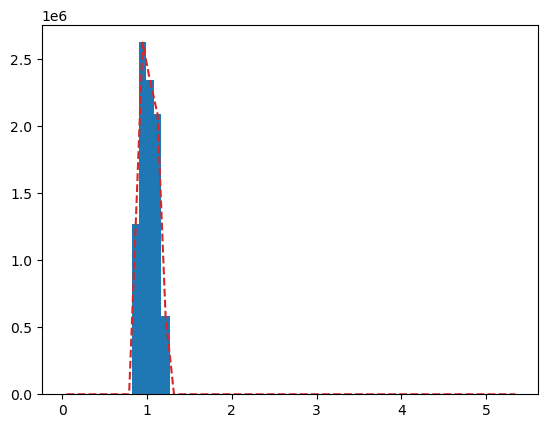

array([1.00072743, 1.00079507, 1.00090511, 0.99917108, 0.99945569])

In [8]:
LensingMocks.conduct_source_planes(los=0, sbin=3)

hist = plt.hist(LensingMocks.redshift_sbin,bins=LensingMocks.zbins[:,1])
plt.plot(LensingMocks.zbins[:,0],LensingMocks.N_T17_persbin[3],c='C'+str(3),linestyle='--')
plt.show()

hist[0][13:18]/LensingMocks.N_T17_persbin[3][13:18]

In [9]:
number_of_galaxies

44553198.14937281

In [10]:
np.sum(LensingMocks.N_T17_persbin)/number_of_galaxies

0.9997726516675555

In [11]:
epsilon_cov = np.array([[(0.3/np.sqrt(2))**2,0.0],[0.0,(0.3/np.sqrt(2))**2]])
epsilon_mean = np.array([0.0,0.0])

gamma_tables = []
for sbin in range(5): 
    gamma_tables.append(LensingMocks.create_sigma_shear_catalogue(los = 0, sbin = sbin, epsilon_cov = epsilon_cov, epsilon_mean=epsilon_mean))

Combining source planes: 100%|██████████| 38/38 [00:06<00:00,  6.09it/s]


adding noise


Combining source planes: 100%|██████████| 38/38 [00:04<00:00,  8.73it/s]


adding noise


Combining source planes: 100%|██████████| 38/38 [00:03<00:00, 10.69it/s]


adding noise


Combining source planes: 100%|██████████| 38/38 [00:04<00:00,  8.01it/s]


adding noise


Combining source planes: 100%|██████████| 38/38 [00:11<00:00,  3.44it/s]


adding noise


## Compute the $\xi_\pm$ using treecorr to check if catalogues are properly created

In [12]:
 
for sbin1 in range(5):
    for sbin2 in np.arange(sbin1,5):

        cat1 = treecorr.Catalog(ra=gamma_tables[sbin1]['ra'], dec=gamma_tables[sbin1]['dec'], g1=gamma_tables[sbin1]['gamma1'], g2=-gamma_tables[sbin1]['gamma2'], w=gamma_tables[sbin1]['weights'], ra_units='deg', dec_units='deg')
        cat2 = treecorr.Catalog(ra=gamma_tables[sbin2]['ra'], dec=gamma_tables[sbin2]['dec'], g1=gamma_tables[sbin2]['gamma1'], g2=-gamma_tables[sbin2]['gamma2'], w=gamma_tables[sbin2]['weights'], ra_units='deg', dec_units='deg')

        # Set up the correlation function
        gg = treecorr.GGCorrelation(nbins=10, min_sep=1, max_sep=100, sep_units='arcmin')

        # Process the catalogue to compute xi+ and xi-
        gg.process(cat1,cat2)

        # Output the results to a file
        gg.write('outputs/xi_EUCLID'+str(sbin1)+'_'+str(sbin2)+'.dat')
        
        cat1 = treecorr.Catalog(ra=gamma_tables[sbin1]['ra'], dec=gamma_tables[sbin1]['dec'], g1=gamma_tables[sbin1]['eobs1'], g2=-gamma_tables[sbin1]['eobs2'], w=gamma_tables[sbin1]['weights'], ra_units='deg', dec_units='deg')
        cat2 = treecorr.Catalog(ra=gamma_tables[sbin2]['ra'], dec=gamma_tables[sbin2]['dec'], g1=gamma_tables[sbin2]['eobs1'], g2=-gamma_tables[sbin2]['eobs2'], w=gamma_tables[sbin2]['weights'], ra_units='deg', dec_units='deg')

        # Set up the correlation function
        gg = treecorr.GGCorrelation(nbins=10, min_sep=1, max_sep=100, sep_units='arcmin')

        # Process the catalogue to compute xi+ and xi-
        gg.process(cat1,cat2)

        # Output the results to a file
        gg.write('outputs/xi_EUCLID_noise_'+str(sbin1)+'_'+str(sbin2)+'.dat')



## Plot the $\xi_\pm$ for noisefree and noisy data

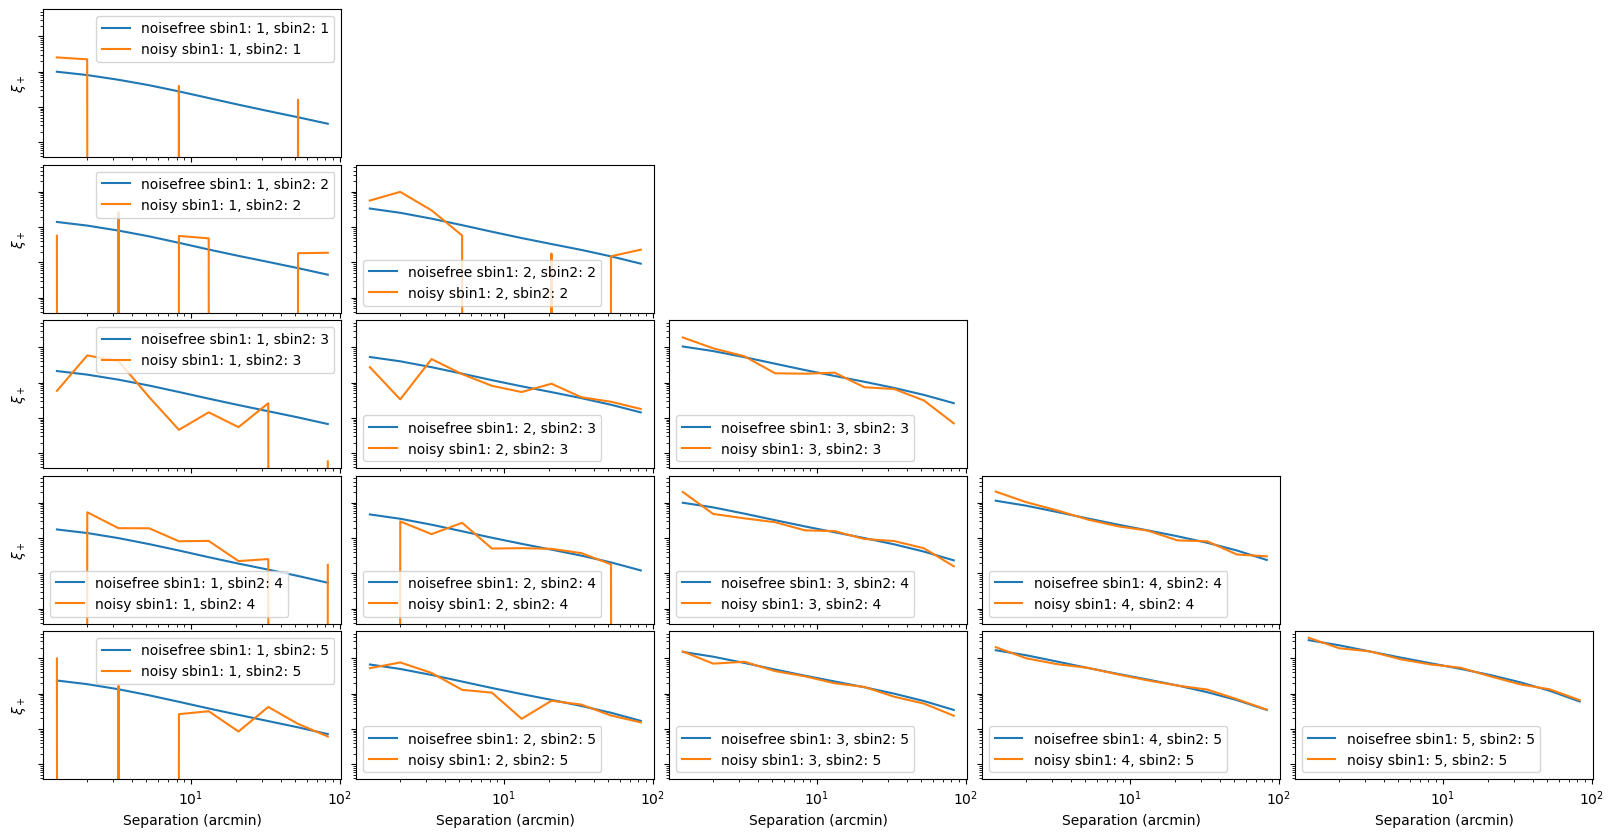

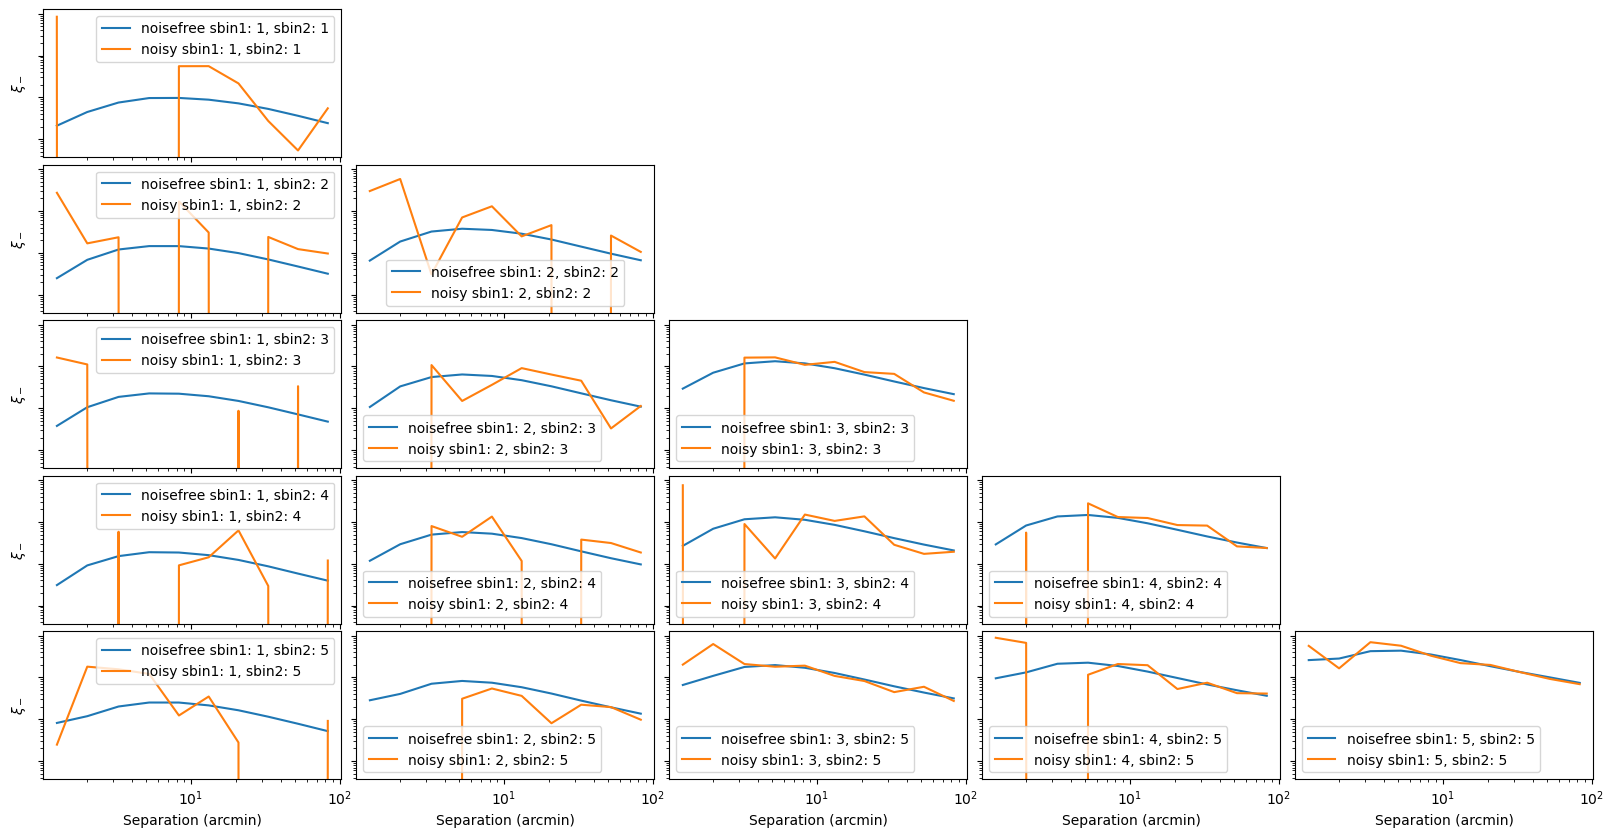

In [13]:

nsbins = 5
fig, axes = plt.subplots(nsbins, nsbins, figsize=(4 * nsbins, 2 * nsbins), sharex='col',sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for i in range(5):
    for j in range(i, 5):
        ax = axes[j, i]
        
        data = np.loadtxt('outputs/xi_Euclid'+str(i)+'_'+str(j)+'.dat')
        ax.loglog(data[:,1],data[:,3], color='C0',label=f'noisefree sbin1: {i+1}, sbin2: {j+1}')
        
        data = np.loadtxt('outputs/xi_Euclid_noise_'+str(i)+'_'+str(j)+'.dat')
        ax.loglog(data[:,1],data[:,3], color='C1',label=f'noisy sbin1: {i+1}, sbin2: {j+1}')
        
        ax.legend()
        
        if j != nsbins - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel('Separation (arcmin)')

        # Hide y tick labels except for the leftmost column
        if i != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel(r'$\xi_+$')
            
    for j in range(0, i):
            axes[j, i].axis('off')
  
plt.show()          
            
fig, axes = plt.subplots(nsbins, nsbins, figsize=(4 * nsbins, 2 * nsbins), sharex='col',sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
for i in range(5):
    for j in range(i, 5):
        
        
        ax = axes[j, i]
        
        data = np.loadtxt('outputs/xi_Euclid'+str(i)+'_'+str(j)+'.dat')
        ax.loglog(data[:,1],data[:,4], color='C0',label=f'noisefree sbin1: {i+1}, sbin2: {j+1}')
        
        data = np.loadtxt('outputs/xi_Euclid_noise_'+str(i)+'_'+str(j)+'.dat')
        ax.loglog(data[:,1],data[:,4], color='C1',label=f'noisy sbin1: {i+1}, sbin2: {j+1}')
        
        ax.legend()
        if j != nsbins - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel('Separation (arcmin)')

        # Hide y tick labels except for the leftmost column
        if i != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel(r'$\xi_-$')
            
    for j in range(0, i):
            axes[j, i].axis('off')
            
plt.show()
